In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

df_train = pd.read_csv('/home/zan/Desktop/dl_autoencoder/docs/autoencoder/deceptive_opinion_autoencoder/deceptive_training.csv')
df_test = pd.read_csv('/home/zan/Desktop/dl_autoencoder/docs/autoencoder/deceptive_opinion_autoencoder/deceptive_testing.csv')

In [2]:
### Remplazar los truthful con 0 y deceptive con 1 en la columna deceptive
df_train = df_train.replace({'deceptive': {'truthful': 0, 'deceptive': 1}})
df_test = df_test.replace({'deceptive': {'truthful': 0, 'deceptive': 1}})

In [3]:
"""
## Split train -- validation
split = int(0.8 * len(df_train))
validation_set = df_train[split:]
df_train = df_train[:split]
"""

'\n## Split train -- validation\nsplit = int(0.8 * len(df_train))\nvalidation_set = df_train[split:]\ndf_train = df_train[:split]\n'

In [4]:
train_dec_a = df_train.iloc[:, 0]
#validation_dec_a = validation_set.iloc[:, 0]
test_dec_a = df_test.iloc[:, 0]

train_dec_a.columns = ['train_dec_a']
#validation_dec_a.columns = ['validation_dec_a']
test_dec_a.columns = ['test_dec_a']

In [5]:

x_train = ()
y_train = ()

for index, row in df_train.iterrows():
    res = list(map(float, row['text'].split(' ')))
    res = np.asarray(res, dtype=np.float32)
    x_train = x_train + (res,)
    y_train = y_train + (row['deceptive'],)

"""
x_validation = ()
y_validation = ()

for index, row in validation_set.iterrows():
    res = list(map(float, row['text'].split(' ')))
    res = np.asarray(res, dtype=np.float32)
    x_validation = x_validation + (res,)
    y_validation = y_validation + (row['deceptive'],)
"""
x_test = ()
y_test = ()

for index, row in df_test.iterrows():
    res = list(map(float, row['text'].split(' ')))
    res = np.asarray(res, dtype=np.float32)
    x_test = x_test + (res,)
    y_test = y_test + (row['deceptive'],)


In [6]:
import numpy as np
x_train, y_train = np.asarray(x_train), np.asarray(y_train)
#x_validation, y_validation = np.asarray(x_validation), np.asarray(y_validation)
x_test, y_test = np.asarray(x_test), np.asarray(y_test)

x_train = x_train.astype('float32')
#x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')

In [8]:
#x_validation.shape

In [7]:
# reshape inputs for LSTM [samples, timesteps, features]
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1]) # X_train 
print("Training data shape:", x_train.shape)
#x_validation = x_validation.reshape(x_validation.shape[0], 1, x_validation.shape[1]) # X_train 
#print("Validation data shape:", x_validation.shape)
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])     # X_test 
print("Test data shape:", x_test.shape)

Training data shape: (597, 1, 300)
Test data shape: (198, 1, 300)


## Primer MODELO -- mediante LSTM

In [8]:
## Autoencoder simple 

import keras
from keras.layers import Dense, Input, Conv2D, Flatten, Reshape, Conv2DTranspose, LSTM, TimeDistributed, RepeatVector, Dropout
from keras.models import Model
from keras.utils import plot_model
from keras import backend as BE
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt

def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(32, activation='relu', return_sequences=True,  
              kernel_regularizer=regularizers.l1(0.01))(inputs)
    L2 = Dropout(0.2)(L1)   
    L3 = LSTM(4, activation='relu', return_sequences=False, kernel_regularizer=regularizers.l1(0.01))(L2)
    L4 = RepeatVector(X.shape[1])(L3)
    L5 = LSTM(4, activation='relu', return_sequences=True)(L4)
    L6 = LSTM(32, activation='relu', return_sequences=True, kernel_regularizer=regularizers.l1(0.01), activity_regularizer=regularizers.l2(0.01))(L5) 
    output = TimeDistributed(Dense(X.shape[2]))(L6)    
    model = Model(inputs=inputs, outputs=output)
    return model


## LSTM extendido

In [8]:
import keras
from keras.layers import Dense, Input, Conv2D, Flatten, Reshape, Conv2DTranspose, LSTM, TimeDistributed, RepeatVector, Dropout
from keras.models import Model
from keras.utils import plot_model
from keras import backend as BE
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt


def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(128, activation='relu', return_sequences=True,  
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(32, activation='relu', return_sequences=True)(L1)
    L3 = LSTM(4, activation='relu', return_sequences=False)(L2)
    L4 = RepeatVector(X.shape[1])(L3)
    L5 = LSTM(4, activation='relu', return_sequences=True)(L4)
    L6 = LSTM(32, activation='relu', return_sequences=True)(L5)
    L7 = LSTM(128, activation='relu', return_sequences=True)(L6)
    output = TimeDistributed(Dense(X.shape[2]))(L7)    
    model = Model(inputs=inputs, outputs=output)
    return model


## Modelo Vanilla LSTM

In [16]:
import keras
from keras.layers import Dense, Input, Conv2D, Flatten, Reshape, Conv2DTranspose, LSTM, TimeDistributed, RepeatVector, Dropout
from keras.models import Model
from keras.utils import plot_model
from keras import backend as BE
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu',  
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    output = (Dense(X.shape[2])) (L1)    
    model = Model(inputs=inputs, outputs=output)
    return model

## Modelo LSTM -- utilizando el Keras Tuner

In [11]:
## Aparte del modelo vamos a definir los hiperparametros construyendo el hypermodelo
## Vamos a utilizar o bien una funccion builder o utilizar una subclase HyperModel usando la Keras Tuner 

import keras
from keras.layers import Dense, Input, Conv2D, Flatten, Reshape, Conv2DTranspose, LSTM, TimeDistributed, RepeatVector, Dropout
from tensorflow.keras import models, layers
from keras.models import Model, Sequential
from keras.utils import plot_model
from keras import backend as BE
from keras import regularizers
import kerastuner as kt
from kerastuner import HyperModel
from kerastuner import Hyperband
from kerastuner import BayesianOptimization
from kerastuner.tuners import RandomSearch

import numpy as np
import matplotlib.pyplot as plt


class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        model.add(
            layers.LSTM(300,
                #units=hp.Int('units', 8, 64, 4, default=8),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                return_sequences=True,
                input_shape=input_shape
            )
        )
        
        L1=model.add(
            layers.LSTM(
                units=hp.Int('units_2', min_value=16, max_value=256, step=16), # 'units_2', 16, 32, 64, default=32),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                    kernel_regularizer=regularizers.l2(hp.Choice('regularizers.l2', values=[0.00, 0.01, 0.05, 0.1])), # Valorarlo... 
                return_sequences=True,
                input_shape=input_shape
            )
        ) 
        
        L2=model.add(
            layers.LSTM(
                units=hp.Int('units_3', min_value=2, max_value=32, step=2),              #'units_3', 2, 4, 8, default=4
                activation=hp.Choice( 
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                return_sequences=True,
                input_shape=input_shape
            )
        )  
        
        
        L3=model.add(
            layers.LSTM(
                units=hp.Int('units_4', min_value=2, max_value=32, step=2),              #'units_3', 2, 4, 8, default=4
                activation=hp.Choice( 
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                return_sequences=True,
                input_shape=input_shape
            )
        ) 
        
        L4=model.add(
            layers.LSTM(
                units=hp.Int('units_5', min_value=16, max_value=256, step=16),        #'units_4', 16, 32, 64, default=32
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                return_sequences=True,
                input_shape=input_shape
            )
        )
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        model.add(layers.Dense(300))
        optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop','nadam', 'adadelta',
                                            'adagrad', 'adamax','ftrl'])
        model.compile(
            optimizer=optimizer,loss='mse',metrics=['mse']
        )
        
        return model

In [12]:
input_shape = (x_train.shape[1],x_train.shape[2],)
hypermodel = RegressionHyperModel(input_shape)

In [13]:
tuner_rs = RandomSearch(
            hypermodel,
            objective='mse',
            seed=10,
            max_trials= 2,
            project_name='opiniondetection',
            directory='/home/zan/Desktop/dl_autoencoder/docs/autoencoder/deceptive_opinion_autoencoder/',
            overwrite=True,
            executions_per_trial=2)

In [14]:
tuner_rs.search(x_train, x_train, epochs=20, validation_split = 0.2, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [15]:
tuner_rs.search_space_summary()

Search space summary
Default search space size: 8
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
regularizers.l2 (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.01, 0.05, 0.1], 'ordered': True}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 32, 'step': 2, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 32, 'step': 2, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
dropout (Float)
{'default': 0.005, 'conditions': [], 'min_value': 0.0, 'max_value': 0.1, 'step': 0.01, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop', 'nadam', 'adadelta', 'adagrad', 'adamax', 'ftrl']

In [16]:
tuner_rs.results_summary()

Results summary
Results in /home/zan/Desktop/dl_autoencoder/docs/autoencoder/deceptive_opinion_autoencoder/opiniondetection
Showing 10 best trials
Objective(name='mse', direction='min')
Trial summary
Hyperparameters:
dense_activation: sigmoid
units_2: 128
regularizers.l2: 0.1
units_3: 10
units_4: 6
units_5: 240
dropout: 0.04
optimizer: adamax
Score: 0.23911812901496887


In [17]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
loss, mse = best_model.evaluate(x_test, x_test)

7/7 [==============================] - 0s 14ms/step - loss: 0.4058 - mse: 0.2326


In [18]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
loss, mse = best_model.evaluate(x_train, x_train)

19/19 [==============================] - 0s 15ms/step - loss: 0.4072 - mse: 0.2340


In [19]:
tuner_rs.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

{'dense_activation': 'sigmoid',
 'units_2': 128,
 'regularizers.l2': 0.1,
 'units_3': 10,
 'units_4': 6,
 'units_5': 240,
 'dropout': 0.04,
 'optimizer': 'adamax'}

In [20]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
mse_rs = best_model.evaluate(x_test, x_test)[1]
print('Random search MSE: ', mse_rs)

7/7 [==============================] - 0s 11ms/step - loss: 0.4058 - mse: 0.2326
Random search MSE:  0.2325824648141861


## Hyperband

In [28]:
tuner_hb = Hyperband(
            hypermodel,
            max_epochs= 20,
            objective='mse',
            seed=100,
            overwrite=True,
            executions_per_trial=4
        )

In [29]:
tuner_hb.search(x_train, x_train, epochs= 10, validation_split = 0.2, verbose=0)
best_model = tuner_hb.get_best_models(num_models=1)[0]
best_model.evaluate(x_test, x_test)

KeyboardInterrupt: 

In [ ]:
tuner_hb.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

In [ ]:
best_model = tuner_hb.get_best_models(num_models=1)[0]
mse_hb = best_model.evaluate(x_test, x_test)[1]
print('Hyperband Optimization MSE: ', mse_hb)

## Bayesian Optimization

In [30]:
tuner_bo = BayesianOptimization(
            hypermodel,
            objective='mse',
            max_trials=2,
            seed=10,
            overwrite=True,
            executions_per_trial=4
        )

In [31]:
tuner_bo.search(x_train, x_train, epochs=20, validation_split = 0.2, verbose=0) 

INFO:tensorflow:Oracle triggered exit


In [32]:
best_model = tuner_bo.get_best_models(num_models=1)[0]
best_model.evaluate(x_test, x_test)

7/7 [==============================] - 0s 9ms/step - loss: 0.0455 - mse: 0.0201


[0.045450609177351, 0.020069867372512817]

In [33]:
tuner_bo.get_best_models(num_models=1)[0]
tuner_bo.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

{'dense_activation': 'relu',
 'units_2': 176,
 'regularizers.l2': 0.01,
 'units_3': 6,
 'units_4': 30,
 'units_5': 240,
 'dropout': 0.07,
 'optimizer': 'adamax'}

In [34]:
best_model = tuner_bo.get_best_models(num_models=1)[0]
mse_bo = best_model.evaluate(x_test, x_test)[1]
print('Bayesian Optimization MSE: ', mse_bo)

7/7 [==============================] - 0s 8ms/step - loss: 0.0455 - mse: 0.0201
Bayesian Optimization MSE:  0.020069867372512817


## Results for the different keras methods

In [ ]:
tuner_rs.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

In [ ]:
tuner_rs.get_best_models()[0].summary()

In [ ]:
tuner_bo.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

In [ ]:
tuner_bo.get_best_models()[0].summary()

## Limite Keras Tuner

In [10]:
# create the autoencoder model
model = autoencoder_model(x_train)
#opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adamax', loss='mae', metrics=['mae', 'mse', 'mape', 'msle', 
                                                     'cosine_proximity']) #Error absoluto medio (mae), MeanSquaredError mse
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 300)]          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 128)            219648    
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 32)             20608     
_________________________________________________________________
lstm_8 (LSTM)                (None, 4)                 592       
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 4)              0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 32)            

In [11]:
import time
# collect data across multiple repeats
dtrain = DataFrame()
val = DataFrame()
# fit the model to the data

for i in range(1):
    print("Fit model on training data...")
    start = time.time()
    nb_epochs = 300 
    batch_size = 128
        
    history = model.fit(x_train, x_train, epochs=nb_epochs, batch_size=batch_size, validation_split = 0.2, verbose= 0).history 
    end = time.time()
    dtrain[str(i)] = history['loss']
    val[str(i)] = history['val_loss']
    print("Time to training model: ", end='')
    print(end - start)

Fit model on training data...
Time to training model: 48.810532331466675


In [19]:
### Vanilla

import time
# collect data across multiple repeats
dtrain = DataFrame()
val = DataFrame()
# fit the model to the data

for i in range(1):
    print("Fit model on training data...")
    start = time.time()
    nb_epochs = 100 
    batch_size = 128
    
    history = model.fit(x_train, x_train, epochs=nb_epochs, batch_size=batch_size, validation_split = 0.2, verbose= 0).history 
    end = time.time()
    dtrain[str(i)] = history['loss']
    val[str(i)] = history['val_loss']
    print("Time to training model: ", end='')
    print(end - start)

Fit model on training data...
Time to training model: 44.80895972251892


In [12]:
x_train.shape

(597, 1, 300)

                0
count  300.000000
mean     0.171207
std      0.247268
min      0.095567
25%      0.095726
50%      0.095861
75%      0.098196
max      1.173028


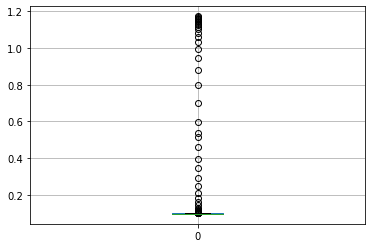

In [13]:
print(dtrain.describe())
dtrain.boxplot()
plt.show()

In [14]:
print("Best MAE on Validation Set =", max(history['val_mae']))

Best MAE on Validation Set = 1.1481152772903442


In [15]:
print("Best MSE on Validation Set =", max(history['val_mse']))

Best MSE on Validation Set = 2.0267395973205566


In [16]:
loss = model.evaluate(x_train, x_train, verbose=0)
print(loss)

[0.09673038125038147, 0.09673038125038147, 0.01882239244878292, 55.06956100463867, 0.0028167206328362226, 0.9941323399543762]


In [48]:
#loss = model.evaluate(x_test, x_test, verbose=0)
#print(loss)

[0.09770647436380386, 0.09770647436380386, 0.018848244100809097, 43.760459899902344, 0.0029782650526612997, 0.9930691123008728]


In [17]:
for name, value in zip(model.metrics_names, loss):
    print(name, value)

loss 0.09673038125038147
mae 0.09673038125038147
mse 0.01882239244878292
mape 55.06956100463867
msle 0.0028167206328362226
cosine_proximity 0.9941323399543762


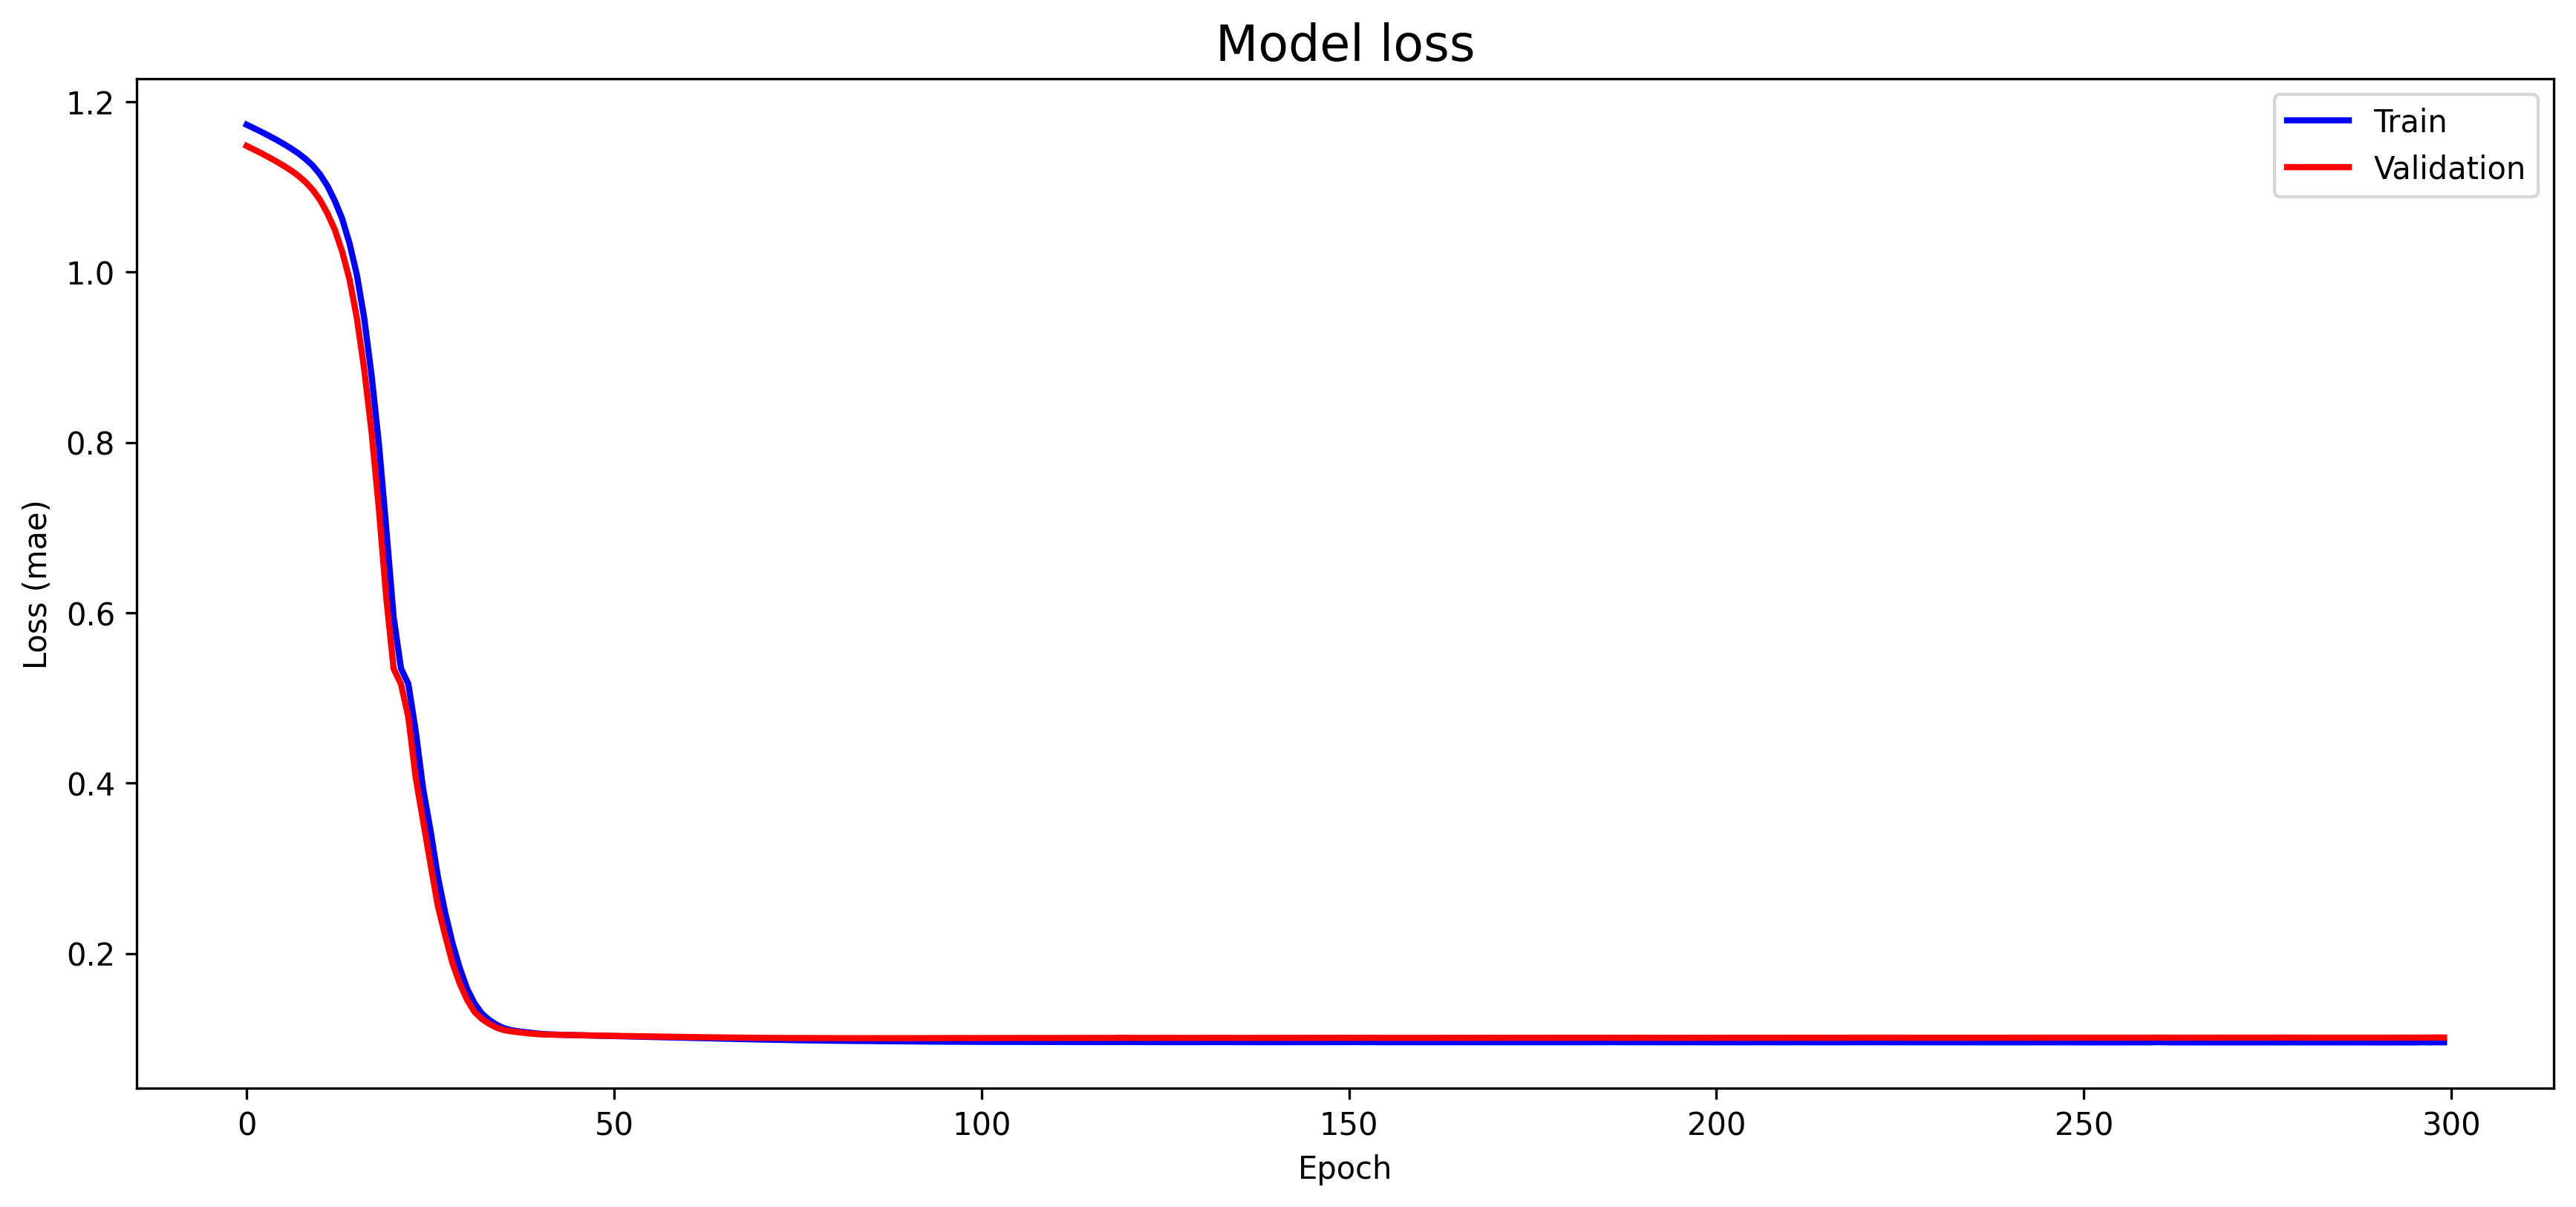

In [18]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

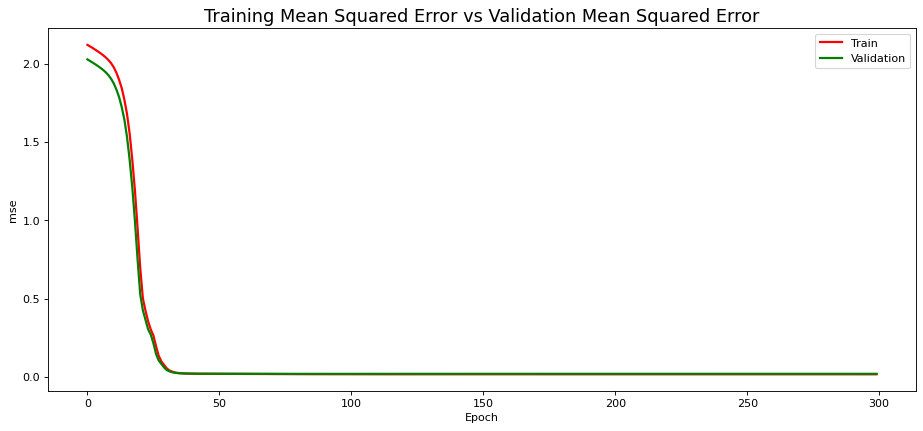

In [19]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['mse'], 'r', label='Train', linewidth=2)
ax.plot(history['val_mse'], 'g', label='Validation', linewidth=2)
ax.set_title('Training Mean Squared Error vs Validation Mean Squared Error', fontsize=16)
ax.set_ylabel('mse')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

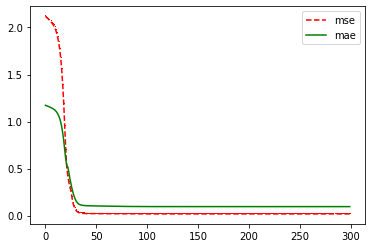

In [20]:
# plot metrics
plt.plot(history['mse'],'r--,', label='mse')
plt.plot(history['mae'],'g', label='mae')
plt.legend(loc='upper right')
plt.show()

## Distributon of Loss Function

"\nXPred = XPred.reshape(XPred.shape[0] * XPred.shape[2], XPred.shape[1])\nXPred = pd.DataFrame(XPred, columns=['text'])\nXPred.index = df_train.index * 200\n\nscored = pd.DataFrame(index=df_train.index)\nXtrain = x_train.reshape(x_train.shape[0] * x_train.shape[2], x_train.shape[1])\nscored['Loss_mae'] = np.mean(np.abs(XPred-Xtrain), axis = 1)\n\n\nplt.figure(figsize=(16,9), dpi= 300)\nplt.title('Loss Distribution', fontsize=16)\nsns.distplot(scored['Loss_mae'], bins = 40, kde= True, color = 'blue')\nplt.xlim([0.001,0.004])\n"

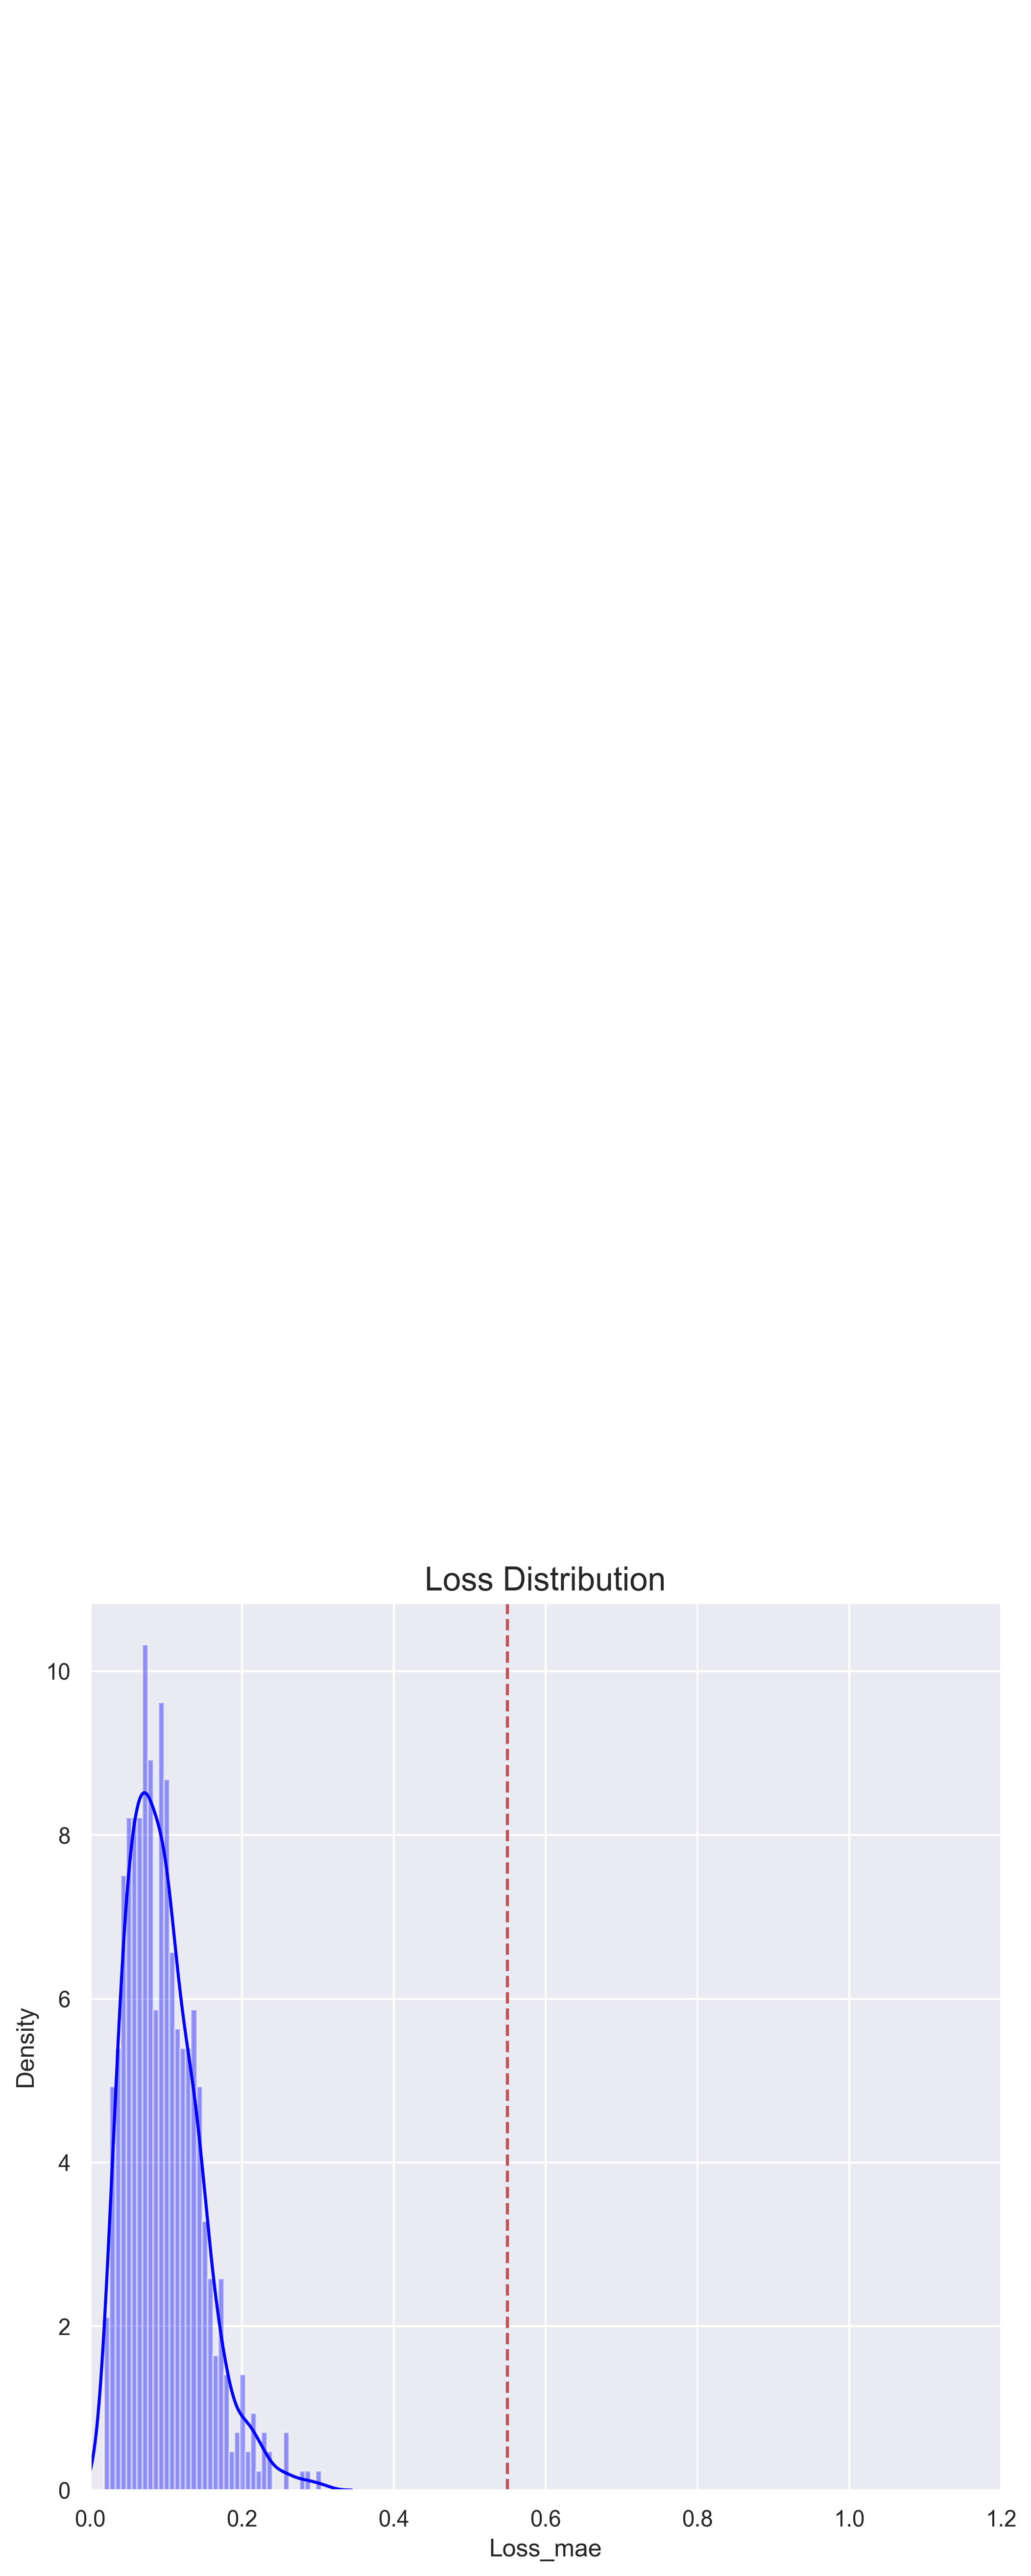

In [21]:
import seaborn as sns
sns.set(color_codes=True)

# plot the loss distribution of the training set
XPred = model.predict(x_train)
XPred = XPred.reshape(XPred.shape[0], XPred.shape[2])
#XPred = XPred.reshape(XPred.shape[0], XPred.shape[1])
XPred = pd.DataFrame(XPred)

XTrain = x_train.reshape(x_train.shape[0], x_train.shape[2])
scored = pd.DataFrame(index=XPred.index)
scored['Loss_mae'] = np.mean(np.abs(XPred-XTrain), axis = 1)

plt.figure(figsize=(8,8), dpi= 300)
plt.title('Loss Distribution', fontsize=16)
plt.axvline(0.55, ls='--', color='r')
plt.annotate('Threshold = 0.55',
            xy=(0.55, 30), xycoords='data', fontsize=10,
            horizontalalignment='center', verticalalignment='bottom')
sns.distplot(scored['Loss_mae'], color = 'blue', bins = 40, kde=True)
plt.xlim([0.00,1.2])
"""
XPred = XPred.reshape(XPred.shape[0] * XPred.shape[2], XPred.shape[1])
XPred = pd.DataFrame(XPred, columns=['text'])
XPred.index = df_train.index * 200

scored = pd.DataFrame(index=df_train.index)
Xtrain = x_train.reshape(x_train.shape[0] * x_train.shape[2], x_train.shape[1])
scored['Loss_mae'] = np.mean(np.abs(XPred-Xtrain), axis = 1)


plt.figure(figsize=(16,9), dpi= 300)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 40, kde= True, color = 'blue')
plt.xlim([0.001,0.004])
"""

In [22]:
# calculate the loss on the test set
XPred = model.predict(x_test)
XPred = XPred.reshape(XPred.shape[0], XPred.shape[2])
##XPred = XPred.reshape(XPred.shape[0], XPred.shape[1])
XPred = pd.DataFrame(XPred)

scored = pd.DataFrame(index=XPred.index)
Xtest = x_test.reshape(x_test.shape[0], x_test.shape[2])

scored['Loss_mae'] = np.mean(np.abs(XPred-Xtest), axis = 1)
scored['Threshold'] = 0.55
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

Loss_mae  Threshold  Anomaly
0  0.099285       0.55    False
1  0.069437       0.55    False
2  0.145948       0.55    False
3  0.078769       0.55    False
4  0.087954       0.55    False

In [23]:
scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Loss_mae   198 non-null    float32
 1   Threshold  198 non-null    float64
 2   Anomaly    198 non-null    bool   
dtypes: bool(1), float32(1), float64(1)
memory usage: 2.6 KB


In [24]:
data_filter = scored[scored['Anomaly'] == True]
data_filter.head(100)

Empty DataFrame
Columns: [Loss_mae, Threshold, Anomaly]
Index: []

In [25]:
# calculate the same metrics for the training set 
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(x_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
## X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[1])
X_pred_train = pd.DataFrame(X_pred_train)

scored_train = pd.DataFrame(index=X_pred_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-XTrain), axis = 1)
scored_train['Threshold'] = 0.55
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

<AxesSubplot:>

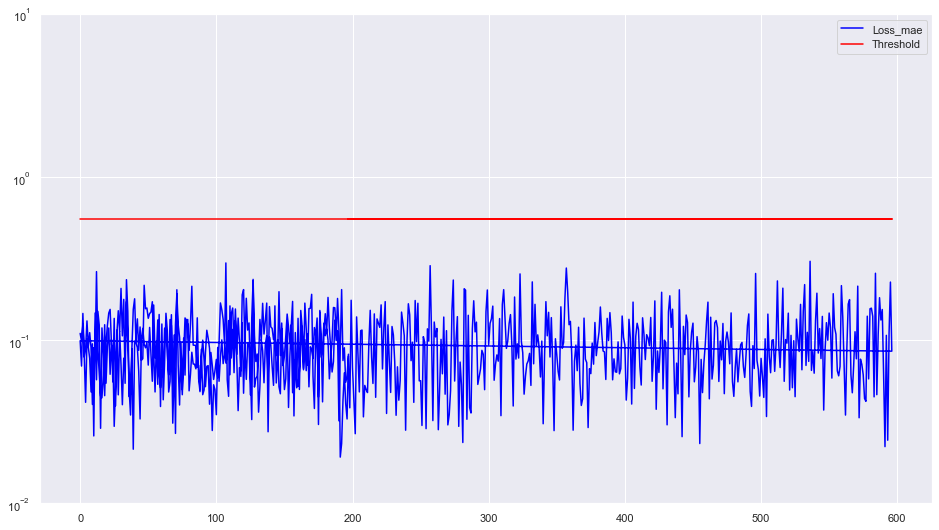

In [26]:
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-2,1e1], color=['blue','red'])

## Determinación de threshold con (max)

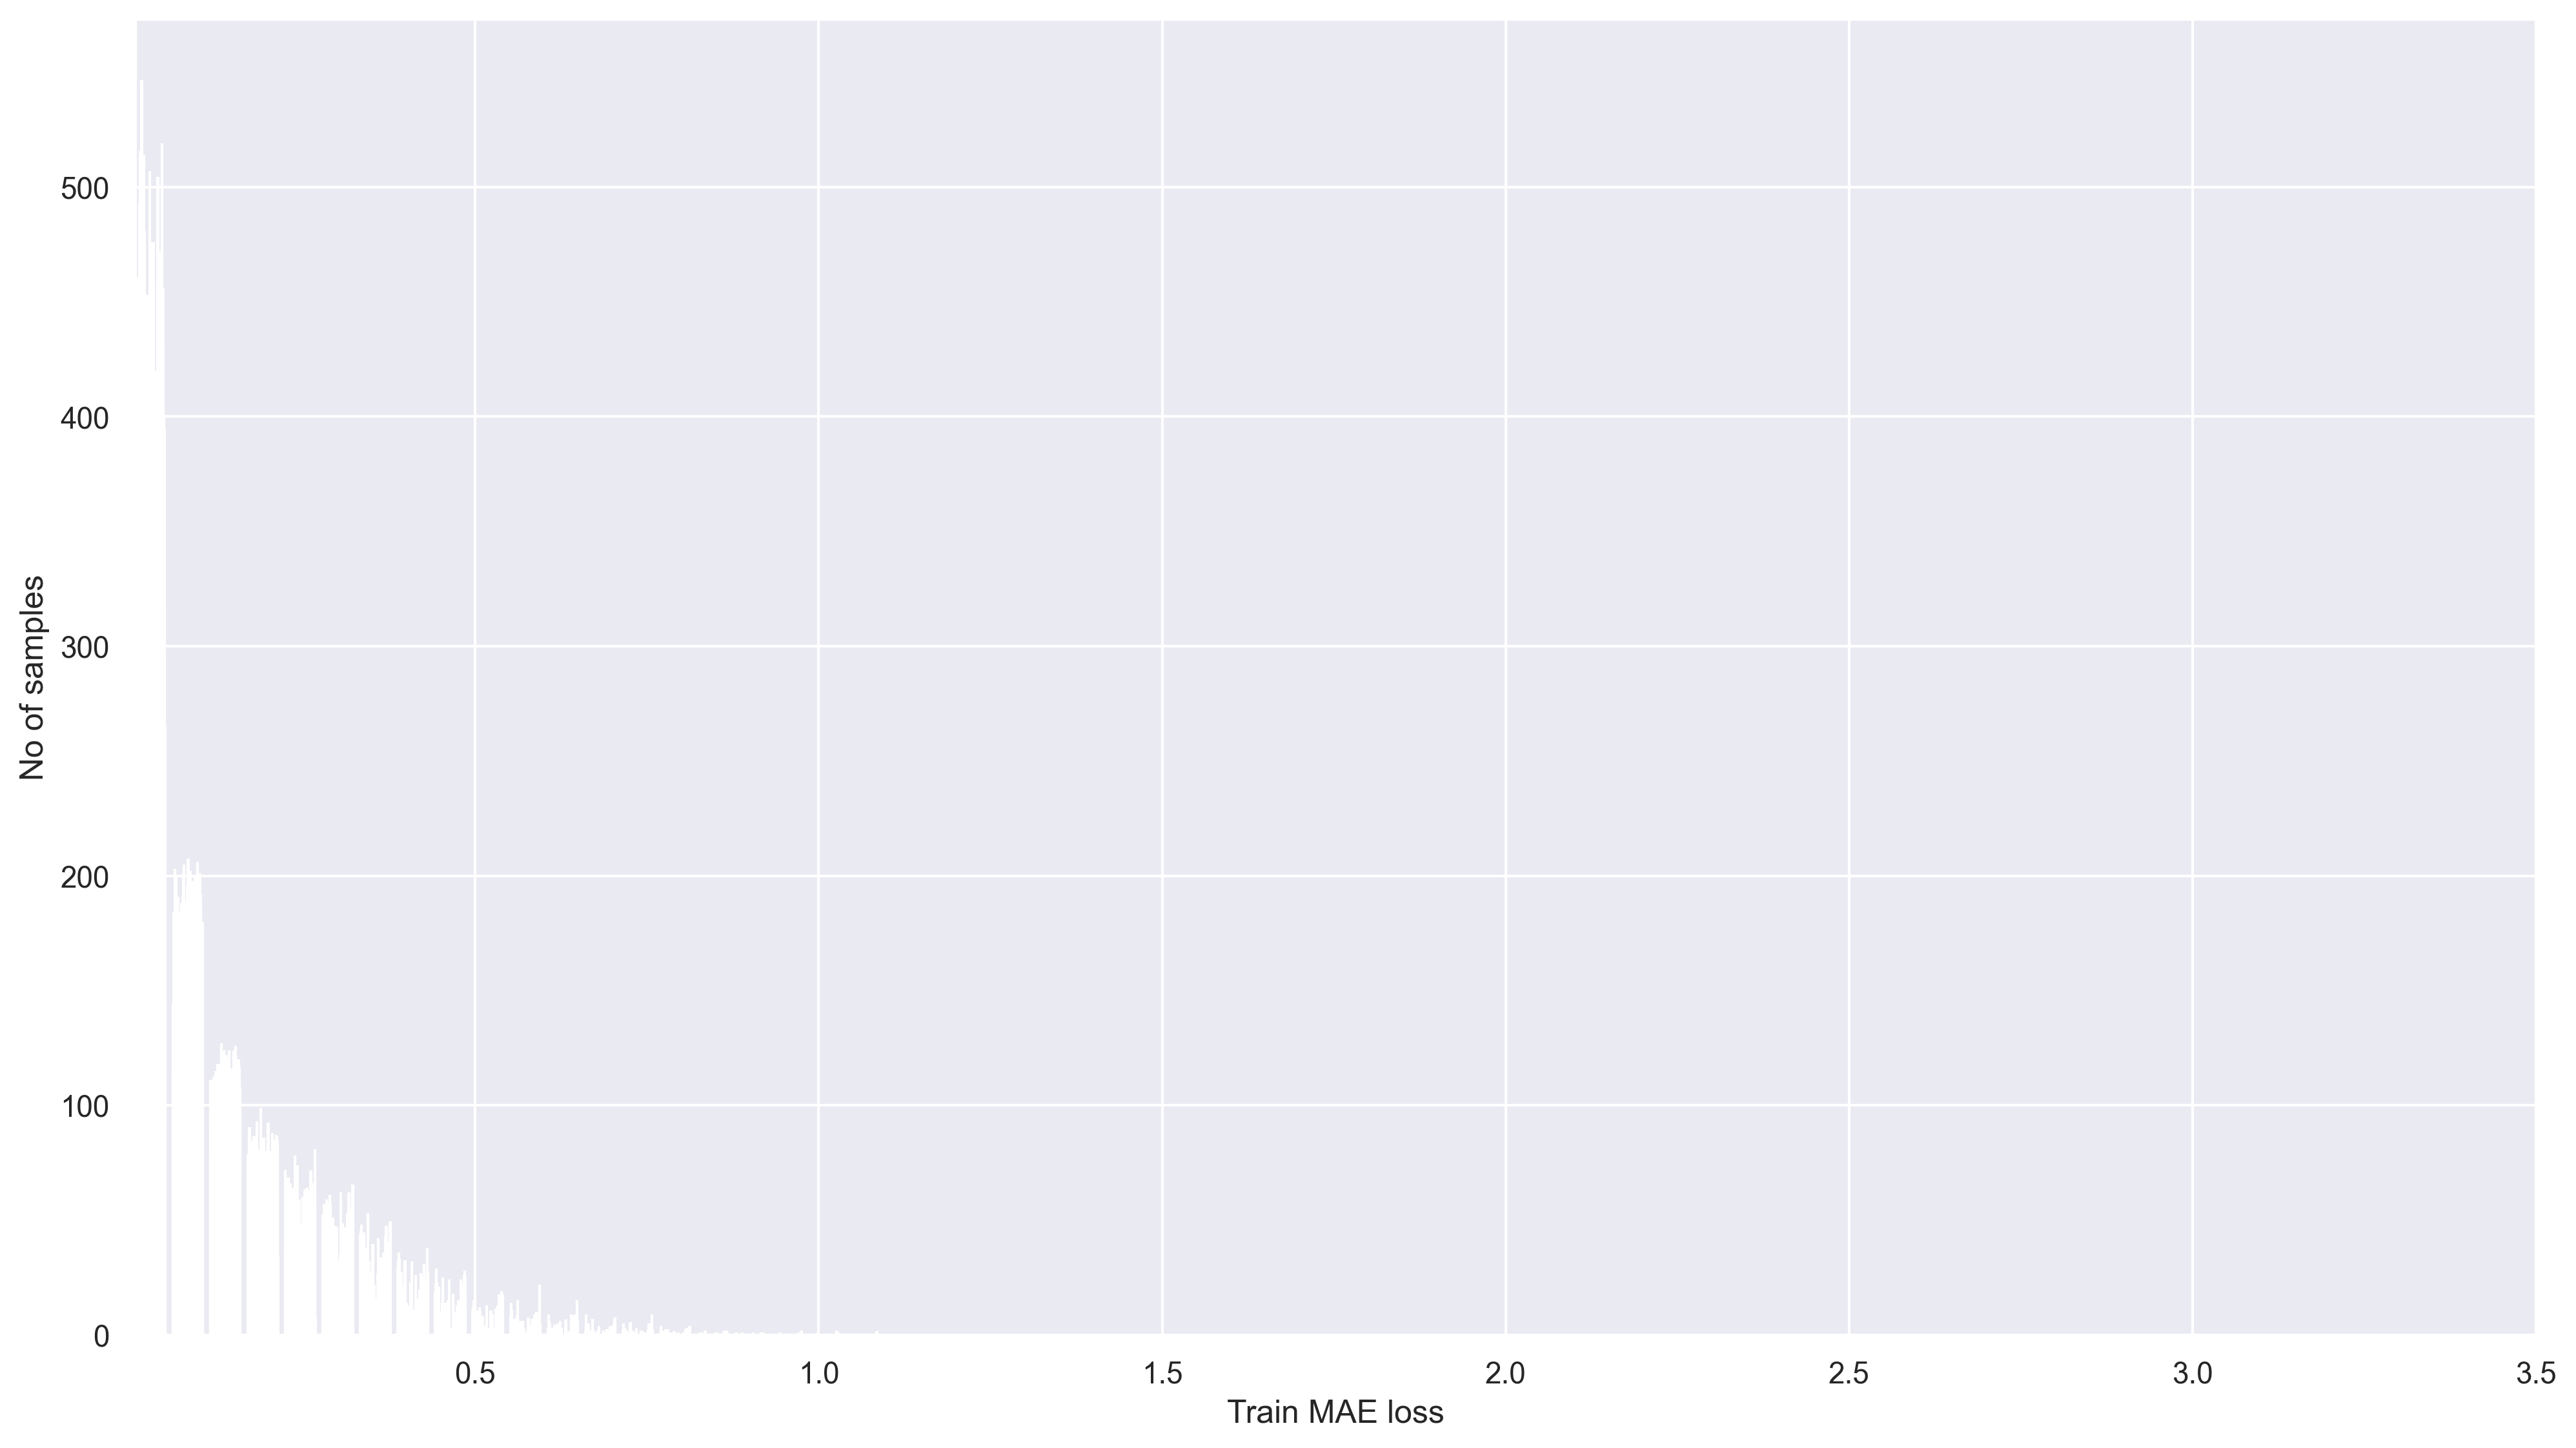

Reconstruction error threshold:  1.0911427


In [27]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
plt.figure(figsize=(16,9), dpi= 300)
plt.hist(train_mae_loss, bins= 20)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.xlim([0.005,3.5])
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

## Determinación de threshold con (mean + std)

In [28]:
reconstructions = model.predict(x_train)
train_loss = np.mean(np.abs(reconstructions - x_train), axis=1)
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


Threshold:  0.19402182


## Determinación de Clasificación. (dataset de train)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, cohen_kappa_score, fbeta_score
from sklearn.metrics import recall_score, classification_report, auc, roc_curve, log_loss
# calculate the loss on the training set
X_pred = model.predict(x_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])    
## X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[1])
X_pred = pd.DataFrame(X_pred)

In [30]:
error_df = pd.DataFrame(index=X_pred.index)
Xtrain = x_train.reshape(x_train.shape[0], x_train.shape[2])
error_df['Reconstruction_error'] = np.mean(np.power(X_pred-Xtrain, 2), axis = 1)
error_df['True_class'] = train_dec_a
error_df.head()

Reconstruction_error  True_class
0              0.019597           0
1              0.015451           0
2              0.023734           0
3              0.010516           0
4              0.002629           0

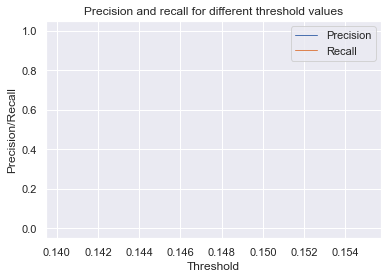

In [31]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=1)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=1)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5, 0, 'False Positive Rate')

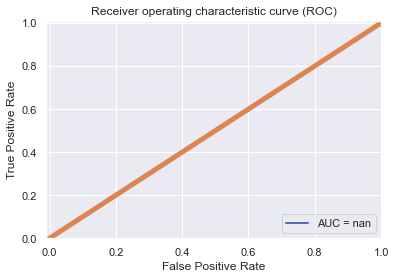

In [32]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=2, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

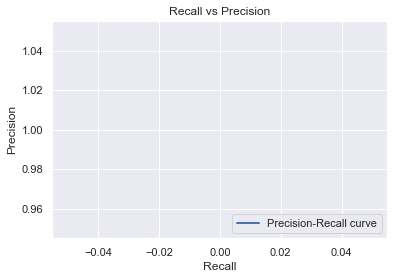

In [33]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=2, label='Precision-Recall curve')
plt.legend(loc='lower right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

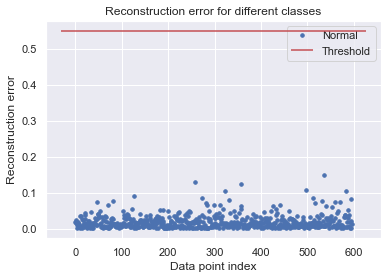

In [34]:
threshold_fixed = 0.55
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "ANOMALY" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

## Confusion Matrix


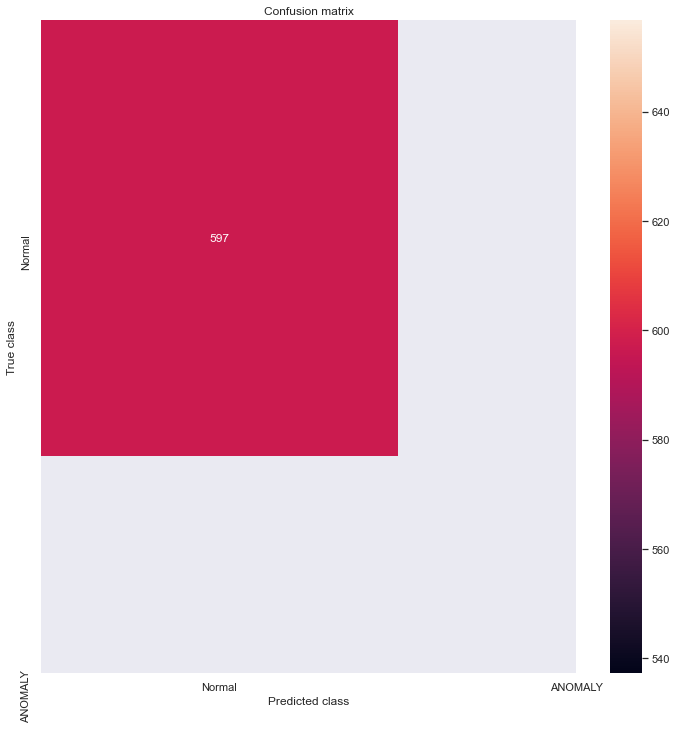

In [35]:
LABELS = ["Normal","ANOMALY"]
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Reconstruction error - Test set

Text(0.5, 1.0, 'Reconstruction error - Train set')

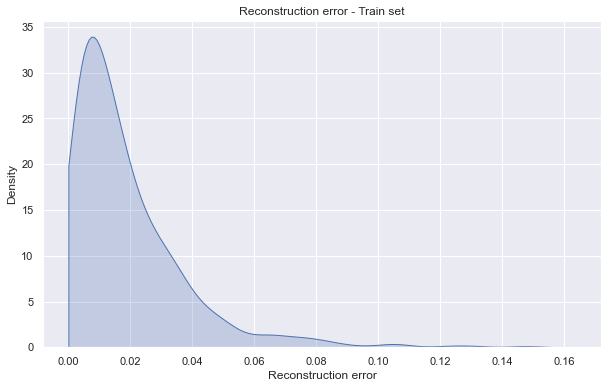

In [36]:
plt.figure(figsize=(10,6))
sns.kdeplot(error_df.Reconstruction_error[error_df.True_class==0], label='Normal', shade=True, clip=(0,10))
sns.kdeplot(error_df.Reconstruction_error[error_df.True_class==1], label='ANOMALY', shade=True, clip=(0,10))
plt.xlabel('Reconstruction error')
plt.title('Reconstruction error - Train set')


## Determinación de Clasificación. Test

In [37]:
# calculate the loss on the test set
X_pred = model.predict(x_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
##X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[1])
X_pred = pd.DataFrame(X_pred)


In [38]:
error_df = pd.DataFrame(index=X_pred.index)
Xtest = x_test.reshape(x_test.shape[0], x_test.shape[2])
error_df['Reconstruction_error'] = np.mean(np.power(X_pred-Xtest, 2), axis = 1)
error_df['True_class'] = test_dec_a
error_df.head()

Reconstruction_error  True_class
0              0.014845           0
1              0.007538           0
2              0.034127           0
3              0.009985           0
4              0.012395           0

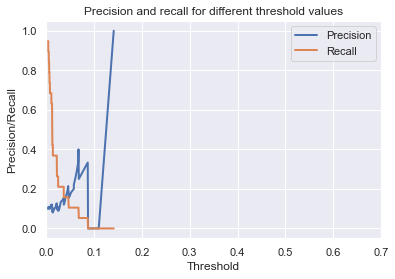

In [39]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=2)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=2)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.xlim([0.0,0.7])
plt.legend()
plt.show()

In [40]:
print(threshold_rt)

[0.00340846 0.00349624 0.00349686 0.00352928 0.00354897 0.00376161
 0.00392333 0.00392409 0.00396841 0.00407253 0.00408143 0.00414624
 0.00420367 0.00420724 0.00420987 0.00472224 0.00480843 0.00484539
 0.00489438 0.00498588 0.00510024 0.00510179 0.00516024 0.0051714
 0.00526086 0.00530182 0.00536904 0.00544512 0.00549273 0.00565804
 0.00574081 0.00576378 0.00581935 0.00589253 0.00593386 0.00609363
 0.0061426  0.00632089 0.00653337 0.00654932 0.00673835 0.00680517
 0.00694584 0.00699176 0.00709909 0.00710629 0.00717511 0.00721306
 0.00731566 0.00746387 0.00753846 0.00757675 0.00787242 0.00792265
 0.0081197  0.00815163 0.00826387 0.00878625 0.00897573 0.009096
 0.00921748 0.00947301 0.00955217 0.00982707 0.00993432 0.00995482
 0.00998521 0.01001695 0.01005481 0.01007762 0.01019299 0.01037338
 0.01038722 0.01080379 0.01086746 0.01121264 0.01158496 0.01162012
 0.01172973 0.01176964 0.01207894 0.0122305  0.01232088 0.01236217
 0.01239524 0.01245323 0.01269239 0.0128443  0.01287636 0.0129478

## ROC CURVE CHECK

Text(0.5, 0, 'False Positive Rate')

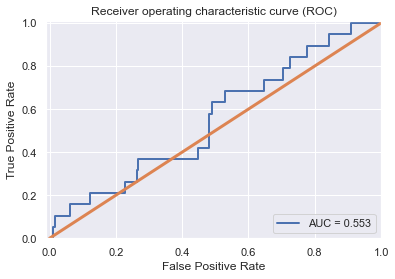

In [41]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=2, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=3)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## RECALL VS PRECISION THRESHOLDING

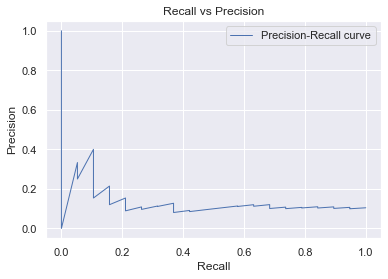

In [42]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=1, label='Precision-Recall curve')
plt.legend(loc='upper right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## Reconstruction Error vs Threshold Check

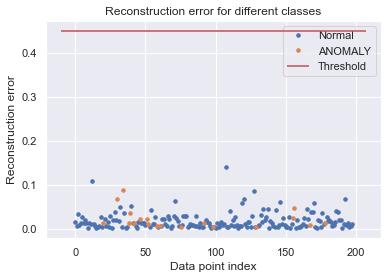

In [43]:
threshold_fixed = 0.45
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='', label= "ANOMALY" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

## Confusion Matrix

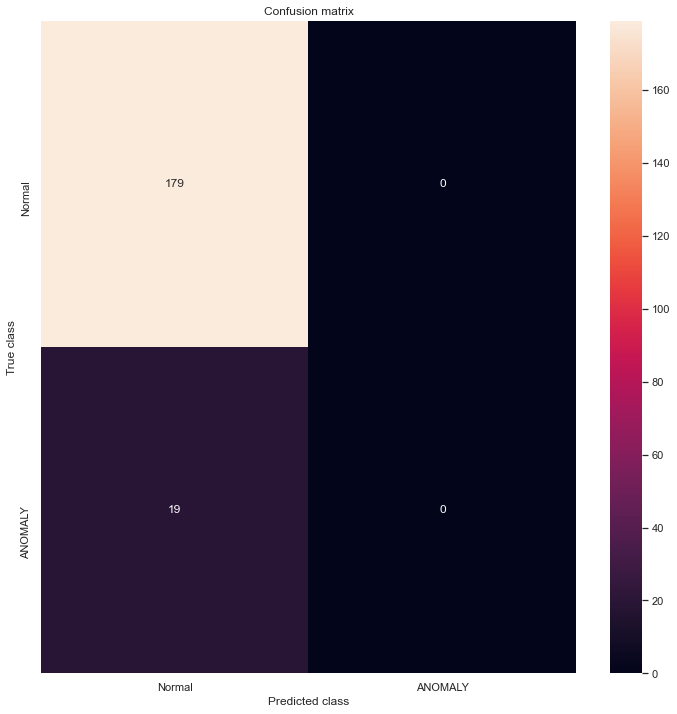

In [44]:
LABELS = ["Normal","ANOMALY"]

pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## MODEL STATS

In [45]:
def print_stats(ytest, ypred):
    print("Accuracy: {:.5f}, Cohen's Kappa Score: {:.5f}".format(
        accuracy_score(ytest, ypred), 
        cohen_kappa_score(ytest, ypred, weights="quadratic")))
    ll = log_loss(ytest, ypred)
    print("Log Loss: {}".format(ll))
    print(' ')
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("Classification Report:")
    print(classification_report(ytest, ypred))

In [46]:
print_stats(error_df.True_class, pred_y)

Accuracy: 0.90404, Cohen's Kappa Score: 0.00000
Log Loss: 3.31432702779446
 
Confusion Matrix:
[[179   0]
 [ 19   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       179
           1       0.00      0.00      0.00        19

    accuracy                           0.90       198
   macro avg       0.45      0.50      0.47       198
weighted avg       0.82      0.90      0.86       198



In [48]:
p = precision_score(error_df.True_class, pred_y)
r = recall_score(error_df.True_class, pred_y)
f = fbeta_score(error_df.True_class, pred_y, beta= 0.5)
print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))

Result: p=0.000, r=0.000, f=0.000


In [49]:
## Modified LSTM, more regularizers + dropout
for threshold_fixed in [0.1, 0.15, 0.2, 0.3]:
    pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.True_class, pred_y)
    print(conf_matrix)
    p = precision_score(error_df.True_class, pred_y)
    r = recall_score(error_df.True_class, pred_y)
    f = fbeta_score(error_df.True_class, pred_y, beta= 0.5)
    print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))
    print_stats(error_df.True_class, pred_y)

[[177   2]
 [ 19   0]]
Result: p=0.000, r=0.000, f=0.000
Accuracy: 0.89394, Cohen's Kappa Score: -0.01862
Log Loss: 3.663211633777701
 
Confusion Matrix:
[[177   2]
 [ 19   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       179
           1       0.00      0.00      0.00        19

    accuracy                           0.89       198
   macro avg       0.45      0.49      0.47       198
weighted avg       0.82      0.89      0.85       198

[[179   0]
 [ 19   0]]
Result: p=0.000, r=0.000, f=0.000
Accuracy: 0.90404, Cohen's Kappa Score: 0.00000
Log Loss: 3.31432702779446
 
Confusion Matrix:
[[179   0]
 [ 19   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       179
           1       0.00      0.00      0.00        19

    accuracy                           0.90       198
   macro avg       0.45      0.50      0.47       198
wei

In [51]:
#### Original LSTM
for threshold_fixed in [0.01, 0.05, 0.08, 0.1, 0.125]:
    pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.True_class, pred_y)
    print(conf_matrix)
    p = precision_score(error_df.True_class, pred_y)
    r = recall_score(error_df.True_class, pred_y)
    f = fbeta_score(error_df.True_class, pred_y, beta= 0.5)
    print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))
    print_stats(error_df.True_class, pred_y)

[[  5 174]
 [  1  18]]
Result: p=0.094, r=0.947, f=0.114
Accuracy: 0.11616, Cohen's Kappa Score: -0.00487
Log Loss: 30.52739898516274
 
Confusion Matrix:
[[  5 174]
 [  1  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.03      0.05       179
           1       0.09      0.95      0.17        19

    accuracy                           0.12       198
   macro avg       0.46      0.49      0.11       198
weighted avg       0.76      0.12      0.07       198

[[ 51 128]
 [  3  16]]
Result: p=0.111, r=0.842, f=0.134
Accuracy: 0.33838, Cohen's Kappa Score: 0.03224
Log Loss: 22.85192957678972
 
Confusion Matrix:
[[ 51 128]
 [  3  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.28      0.44       179
           1       0.11      0.84      0.20        19

    accuracy                           0.34       198
   macro avg       0.53      0.56      0.32       198
we

In [57]:
##### Vanilla LSTM
for threshold_fixed in [0.1, 0.15, 0.2, 0.3]:
    pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.True_class, pred_y)
    print(conf_matrix)
    p = precision_score(error_df.True_class, pred_y)
    r = recall_score(error_df.True_class, pred_y)
    f = fbeta_score(error_df.True_class, pred_y, beta= 0.5)
    print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))
    print_stats(error_df.True_class, pred_y)

[[93 86]
 [ 7 12]]
Result: p=0.122, r=0.632, f=0.146
Accuracy: 0.53030, Cohen's Kappa Score: 0.05288
Log Loss: 16.223105909624696
 
Confusion Matrix:
[[93 86]
 [ 7 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.52      0.67       179
           1       0.12      0.63      0.21        19

    accuracy                           0.53       198
   macro avg       0.53      0.58      0.44       198
weighted avg       0.85      0.53      0.62       198

[[115  64]
 [ 13   6]]
Result: p=0.086, r=0.316, f=0.100
Accuracy: 0.61111, Cohen's Kappa Score: -0.01898
Log Loss: 13.43200483153361
 
Confusion Matrix:
[[115  64]
 [ 13   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       179
           1       0.09      0.32      0.13        19

    accuracy                           0.61       198
   macro avg       0.49      0.48      0.44       198
weighted 

In [205]:
## Extended LSTM
for threshold_fixed in [0.00328, 0.004685, 0.00571, 0.00925, 0.00947, 0.00972]:
    pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.True_class, pred_y)
    print(conf_matrix)
    p = precision_score(error_df.True_class, pred_y)
    r = recall_score(error_df.True_class, pred_y)
    f = fbeta_score(error_df.True_class, pred_y, beta= 0.5)
    print('Result: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))
    print_stats(error_df.True_class, pred_y)

[[ 65 114]
 [  7  12]]
Result: p=0.095, r=0.632, f=0.115
Accuracy: 0.38889, Cohen's Kappa Score: -0.00150
Log Loss: 21.107490393390073
 
Confusion Matrix:
[[ 65 114]
 [  7  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.36      0.52       179
           1       0.10      0.63      0.17        19

    accuracy                           0.39       198
   macro avg       0.50      0.50      0.34       198
weighted avg       0.83      0.39      0.48       198

[[90 89]
 [ 8 11]]
Result: p=0.110, r=0.579, f=0.131
Accuracy: 0.51010, Cohen's Kappa Score: 0.02813
Log Loss: 16.920871083220323
 
Confusion Matrix:
[[90 89]
 [ 8 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.50      0.65       179
           1       0.11      0.58      0.18        19

    accuracy                           0.51       198
   macro avg       0.51      0.54      0.42       198
weighted

## Results 
1. Original LSTM:
    78 - 12
    90 - 11
    102 - 10
    138 - 9
    148 - 8
    151 - 7

2. Extended LSTM:
    65 - 12
    90 - 11
    115 - 10
    146 - 9
    147 - 8
    147 - 7

3. Extended LSTM con mas regularizers y dropout:
    87 - 13
    88 - 12
    89 - 11
    96 - 10
    109 - 9
    110 - 8
    112 - 7
    124 - 6
    

3. Vanilla Model:
    88 - 12
    88 - 11
    99 - 10
    99 - 9
    104 - 8
    105 - 7

## Segundo modelo -- capas Dense (redes NN)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
#Capa input
model.add(layers.Input(shape=(x_train.shape[1],x_train.shape[2])))
#Capas ocultas
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
#Capa salida
model.add(layers.Dense(x_train.shape[2], activation = "sigmoid"))
model.summary()

In [ ]:
model.compile(
 optimizer = "adam",
 loss = "mae",
 metrics = ['mae', 'mse']
)

In [ ]:
history = model.fit(
 x_train, x_train,
 epochs= 50,
 batch_size = 32,
 validation_split= 0.1,
)
print("Validation loss:", np.mean(results.history["val_loss"]))

In [ ]:
etrain = DataFrame()
etrain['B'] = history.history['loss']
print(etrain.describe())
etrain.boxplot()
plt.show()

In [ ]:
print("Best MAE on Validation Set =", max(history.history['val_mae']))

In [ ]:
loss = model.evaluate(x_test, x_test, verbose=0)
print(loss)

In [ ]:
for name, value in zip(model.metrics_names, loss):
    print(name, value)

## Tercer modelo -- Variational Autoencoder

In [ ]:
## VAE -- utilizando resampling del espacio latente
import keras
from keras import layers,models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1DTranspose, Input
from keras import backend as BE


original_dim = 200
intermediate_dim = 20
latent_dim = 15 

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [ ]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = BE.random_normal(shape=(BE.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + BE.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - BE.square(z_mean) - BE.exp(z_log_sigma)
kl_loss = BE.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = BE.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
history = vae.fit(x_train, x_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_test, x_test))

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
## Creamos el plot para mostrar el loss y val_loss durante los epochs

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
"""
import keras
from keras import layers,models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1DTranspose, Input

model = keras.Sequential([
    layers.Input(shape=(x_train.shape[0],x_train.shape[1])),
    layers.Conv1D( 32, 7, padding="same", strides = 2, activation = "relu" ),
    layers.Dropout(rate=0.2),
    layers.Conv1D( 16, 7, padding="same", strides = 2, activation = "relu" ),
    layers.Conv1DTranspose( 16, 7, padding="same", strides = 2, activation = "relu" ),
    layers.Dropout(rate=0.2),
    layers.Conv1DTranspose( 32, 7, padding="same", strides = 2, activation = "relu" ),
    layers.Conv1DTranspose(1, 7, padding="same"),
])
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = "mse")
model.summary()
"""

In [ ]:
"""
history = model.fit(
    x_train,
    x_train,
    epochs = 50,
    batch_size = 32,
    validation_split = 0.1,
    callbacks = [ 
        keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, mode="min")
    ]
)
"""